In [14]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt
import numpy as np

### Declaring the date range for stock returns

In [15]:
endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days=365*5)
endDate, startDate

(datetime.datetime(2023, 8, 29, 19, 12, 7, 337672),
 datetime.datetime(2018, 8, 30, 19, 12, 7, 337672))

### Creating a list of the stocks

In [16]:
stocks = ["MSFT", "AAPL", "QQQ", "SPY"]

### Download the stock data from Yahoo Finance

In [17]:
df = yf.download(stocks, start=startDate, end=endDate)

[*********************100%%**********************]  4 of 4 completed


### Display the dataframe

In [18]:
df.head()

Adj Close                                          Close  \
                 AAPL        MSFT         QQQ         SPY       AAPL   
Date                                                                   
2018-08-30  53.879704  106.064964  180.249680  266.790131  56.257500   
2018-08-31  54.502228  106.425003  180.481781  266.799347  56.907501   
2018-09-04  54.677006  105.837563  179.708221  266.339813  57.090000   
2018-09-05  54.320263  102.786842  177.387497  265.622986  56.717499   
2018-09-06  53.417591  103.023705  175.801712  264.823547  55.775002   

                                                     High              ...  \
                  MSFT         QQQ         SPY       AAPL        MSFT  ...   
Date                                                                   ...   
2018-08-30  111.949997  186.410004  290.299988  57.064999  112.610001  ...   
2018-08-31  112.330002  186.649994  290.309998  57.217499  112.779999  ...   
2018-09-04  111.709999  185.850006  289.809998  57.294998  111.959999  ...   
2018-09-05  108.489998  183.449997  289.029999  57.417500  111.419998  ...   
2018-09-06  108.739998  181.809998  288.160004  56.837502  108.989998  ...   

                   Low                   Open                          \
                   QQQ         SPY       AAPL        MSFT         QQQ   
Date                                                                    
2018-08-30  185.789993  289.630005  55.812500  111.669998  186.380005   
2018-08-31  185.979996  289.290009  56.627499  111.690002  186.179993   
2018-09-04  184.850006  288.679993  57.102501  110.849998  186.080002   
2018-09-05  182.820007  287.890015  57.247501  111.010002  185.520004   
2018-09-06  180.580002  287.000000  56.557499  108.250000  183.529999   

                           Volume                                
                   SPY       AAPL      MSFT       QQQ       SPY  
Date                                                             
2018-08-30  290.940002  195175200  22798700  29315500  61229500  
2018-08-31  289.839996  173360400  23222700  28653200  66140800  
2018-09-04  289.839996  109560400  22634600  29063500  57594400  
2018-09-05  289.410004  133332000  32872400  42623300  72452400  
2018-09-06  289.149994  137160000  23477600  46091400  65909900  

[5 rows x 24 columns]

### Select only the adjusted closing prices

In [19]:
adj_close_prices = df["Adj Close"]
adj_close_prices.head()

,AAPL,MSFT,QQQ,SPY
Date,,,,
2018-08-30,53.879704,106.064964,180.249680,266.790131
2018-08-31,54.502228,106.425003,180.481781,266.799347
2018-09-04,54.677006,105.837563,179.708221,266.339813
2018-09-05,54.320263,102.786842,177.387497,265.622986
2018-09-06,53.417591,103.023705,175.801712,264.823547


### Calculate the daily returns

In [20]:
log_returns = np.log(adj_close_prices / adj_close_prices.shift(1)) # divide each row with the row above
log_returns.head()

,AAPL,MSFT,QQQ,SPY
Date,,,,
2018-08-30,NaN,NaN,NaN,NaN
2018-08-31,0.011488,0.003389,0.001287,0.000035
2018-09-04,0.003202,-0.005535,-0.004295,-0.001724
2018-09-05,-0.006546,-0.029248,-0.012998,-0.002695
2018-09-06,-0.016757,0.002302,-0.008980,-0.003014


### Calculate the cumulative returns

In [21]:
cumulative_log_returns = log_returns.cumsum()

### Plot the cumulative returns

<Axes: title={'center': 'Cumulative returns'}, xlabel='Date'>

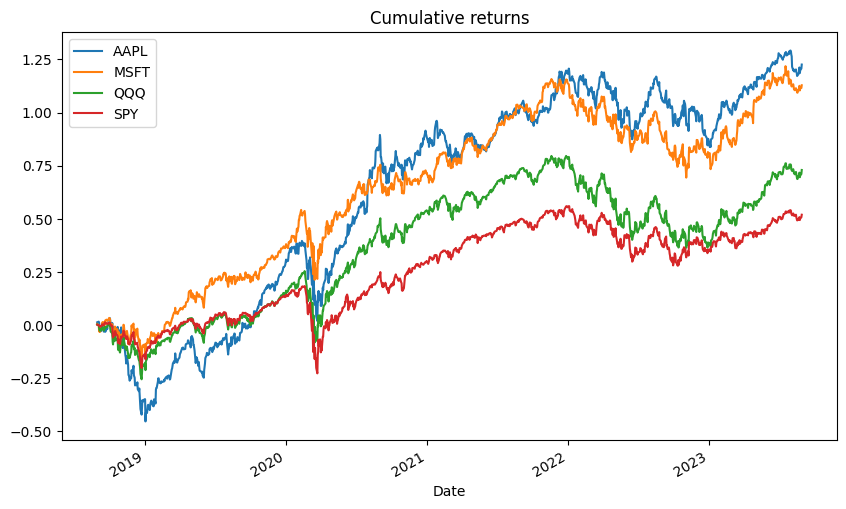

In [22]:
cumulative_log_returns.plot(title="Cumulative returns", figsize=(10,6))